In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from fastai import *
from fastai.vision import *
#from fastai.vision.all import *
#from fastai.vision.data import ImageDataLoaders
from fastai.metrics import error_rate

In [4]:
bs = 16

In [5]:
path = Path('house_type')

In [6]:
path.ls()

[PosixPath('house_type/unfurnished_house'),
 PosixPath('house_type/furnished_house')]

In [7]:
classes = ['unfurnished_house','furnished_house']

In [8]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2, bs=bs,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [9]:
data.classes

['furnished_house', 'unfurnished_house']

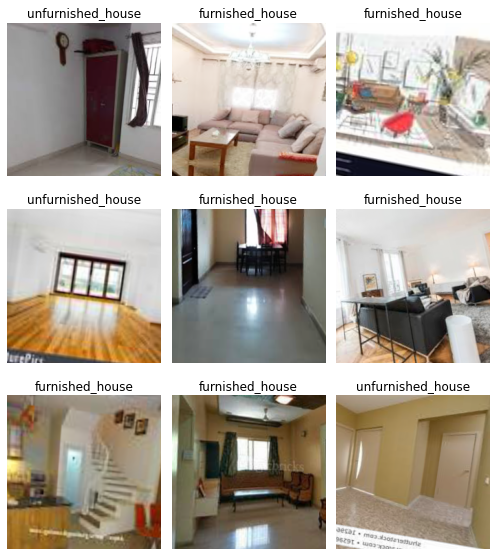

In [11]:
data.show_batch(rows=3, figsize=(7,8))

In [12]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['furnished_house', 'unfurnished_house'], 2, 383, 95)

In [13]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [14]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [15]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.910587,0.414710,0.168421,00:34
1,0.727806,0.496735,0.115789,00:33
2,0.535199,0.281194,0.094737,00:33
3,0.405204,0.268516,0.094737,00:35


In [16]:
learn.save('stage-1')

In [17]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

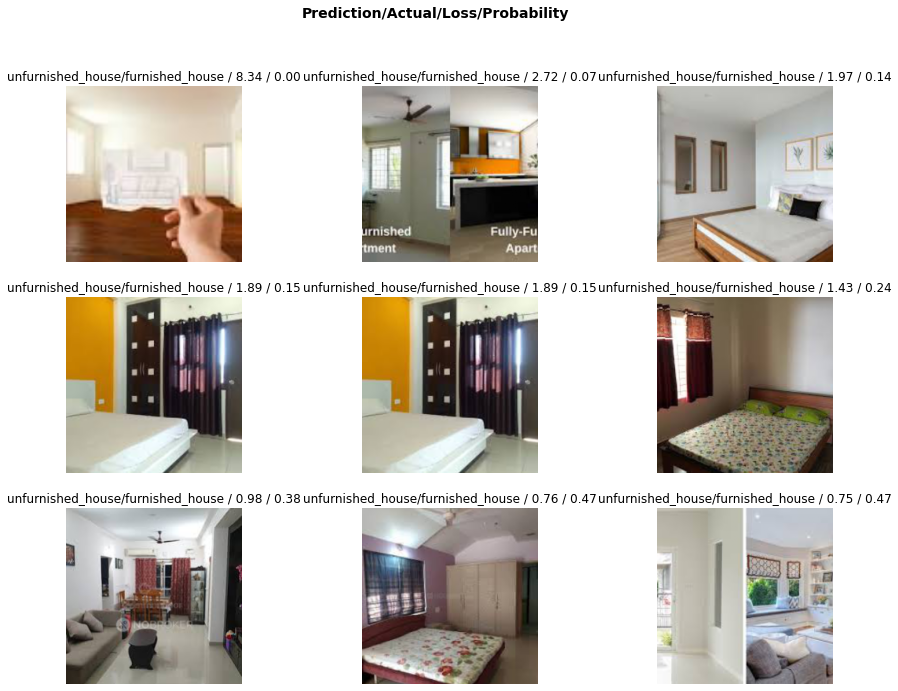

In [18]:
interp.plot_top_losses(9, figsize=(15,11))

In [19]:
doc(interp.plot_top_losses)

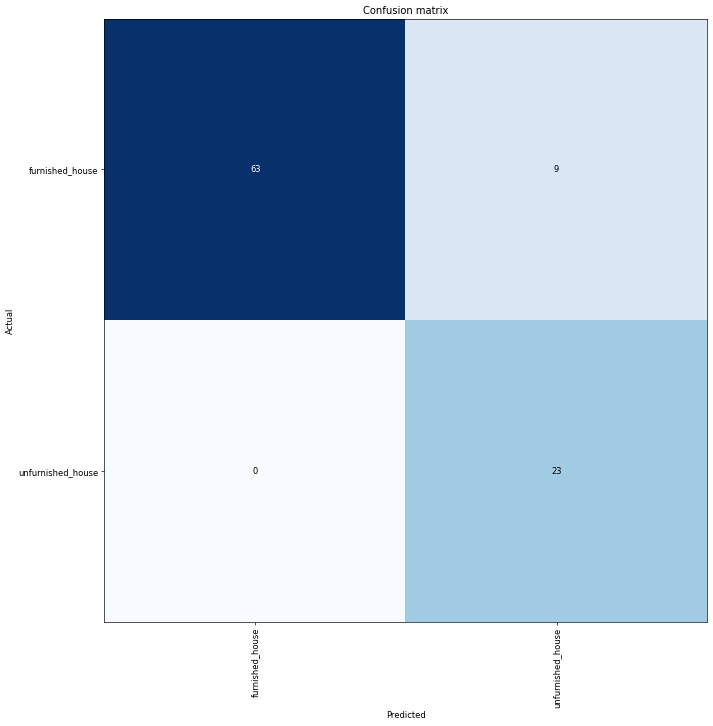

In [20]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [23]:
learn.export()

In [37]:
path = Path('house_type')

In [38]:
path.ls()

[PosixPath('house_type/models'),
 PosixPath('house_type/unfurnished_house'),
 PosixPath('house_type/export.pkl'),
 PosixPath('house_type/furnished_house')]

In [45]:
model_inf = load_learner(path)

In [46]:
testpath = Path('house_type')

In [47]:
testpath.ls()

[PosixPath('house_type/models'),
 PosixPath('house_type/unfurnished_house'),
 PosixPath('house_type/export.pkl'),
 PosixPath('house_type/test'),
 PosixPath('house_type/furnished_house')]

In [49]:
from PIL import Image  
  
# creating a object  
im = Image.open(testpath/'test/test1.jpg')  
  
im.show() 

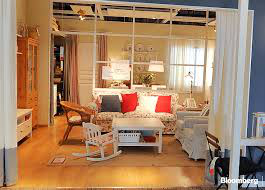

In [116]:
test_image=open_image(testpath/'test/test4.jpg')
test_image

In [117]:
pred_class, pred_idx, outputs = model_inf.predict(test_image)
type(category_pred)
str(pred_class)

'furnished_house'